# Diamonds Project

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score

Rick has 5000 diamonds and, in
this episode, he’s called you to
valuate them.
Your job is to upload a .csv file
containing the 5000 diamonds
and  a new column:
price_predicted containing the
predictions of your linear model.
Your goal is exclusively to estimate the price of Rick’s
5000 diamonds achieving the smallest amount of
error, so they can sell it properly.

# Getting to know the database

In [99]:
diamonds=pd.read_csv("data/HistoricalDiamonds.csv")

In [100]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [101]:
diamonds.shape

(48940, 10)

In [102]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [103]:
diamonds['price'].mean()

3934.409644462607

In [107]:
diamonds.shape

(48940, 10)

In [104]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [105]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


# Baseline Model

I will use the mean as a predictor. This will be our baseline

In [108]:
diamonds['price predictor']=diamonds['price'].mean()

In [109]:
model=LinearRegression()
model.fit(diamonds[['price predictor']],diamonds['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
y_pred=model.predict(diamonds[['price predictor']])

In [111]:
mean_squared_error(diamonds['price'],y_pred)**0.5

3989.293102899151

In [112]:
r2_score(diamonds['price'],y_pred)

0.0

# Column cut

In [113]:
diamonds['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [114]:
diamonds['cut scale']=0
diamonds.loc[diamonds['cut']=='Good','cut scale']=1
diamonds.loc[diamonds['cut']=='Very Good','cut scale']=2
diamonds.loc[diamonds['cut']=='Ideal','cut scale']=3
diamonds.loc[diamonds['cut']=='Premium','cut scale']=4

(array([ 1460.,     0.,  4443.,     0.,     0., 10922.,     0., 19608.,
            0., 12507.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

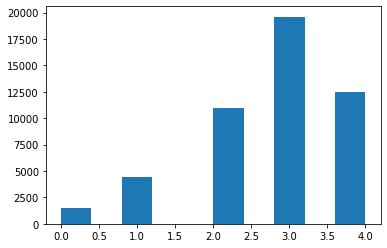

In [153]:
plt.hist(diamonds['cut scale'])

In [115]:
model=LinearRegression()

In [116]:
model.fit(diamonds[['cut scale']],diamonds['price'])
y_pred=model.predict(diamonds[['cut scale']])

In [117]:
mean_squared_error(diamonds['price'],y_pred)**0.5

3987.810283255214

In [118]:
r2_score(diamonds['price'],y_pred)

0.000743261537208717

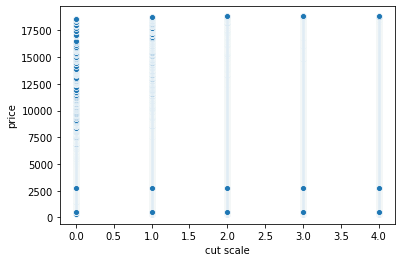

In [119]:
sns.scatterplot(diamonds['cut scale'],diamonds['price'])

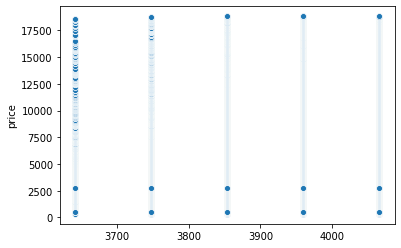

In [120]:
sns.scatterplot(y_pred,diamonds['price'])

In [121]:
model.coef_

array([105.96730183])

Lets try to create a different scale for this variable

In [171]:
diamonds['cut isPremium']=0
diamonds.loc[diamonds['cut']=='Premium','cut isPremium']=1

(array([36433.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12507.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

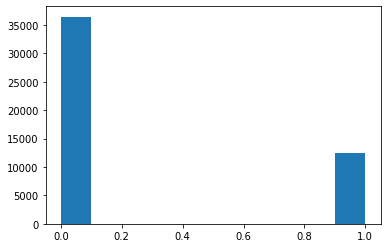

In [173]:
plt.hist(diamonds['cut isPremium'])

In [179]:
model=LinearRegression()

In [180]:
model.fit(diamonds[['cut isPremium']],diamonds['price'])
y_pred=model.predict(diamonds[['cut isPremium']])

In [181]:
mean_squared_error(diamonds['price'],y_pred)**0.5

3971.2136780086107

In [182]:
r2_score(diamonds['price'],y_pred)

0.00904343529795737

# Column carat

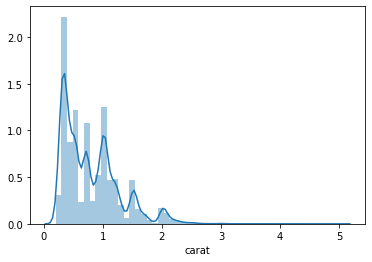

In [122]:
sns.distplot(diamonds['carat'])

In [123]:
model=LinearRegression()

In [124]:
model.fit(diamonds[['carat']],diamonds['price'])
y_pred=model.predict(diamonds[['carat']])

In [125]:
mean_squared_error(diamonds['price'],y_pred)**0.5

1542.8464716474002

In [126]:
r2_score(diamonds['price'],y_pred)

0.850426887514948

In [127]:
model.coef_

array([7759.35277644])

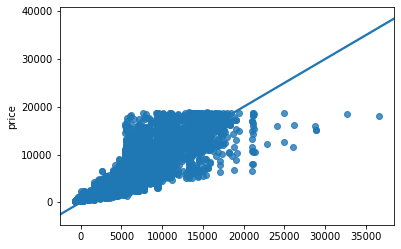

In [128]:
sns.regplot(y_pred,diamonds['price'])

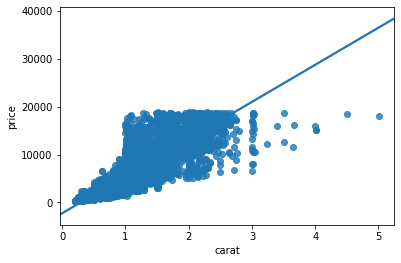

In [310]:
sns.regplot(diamonds['carat'],diamonds['price'])

# Column clarity

Lets turn clarity into a scale

In [129]:
diamonds['clarity'].unique()

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [130]:
diamonds['clarity scale']=0
diamonds.loc[diamonds['clarity']=='SI2','clarity scale']=1
diamonds.loc[diamonds['clarity']=='SI1','clarity scale']=2
diamonds.loc[diamonds['clarity']=='VS2','clarity scale']=3
diamonds.loc[diamonds['clarity']=='VVS2','clarity scale']=4
diamonds.loc[diamonds['clarity']=='VVS1','clarity scale']=5
diamonds.loc[diamonds['clarity']=='IF','clarity scale']=6

(array([ 8107.,  8307.,     0., 11832.,     0., 11125.,  4635.,     0.,
         3321.,  1613.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

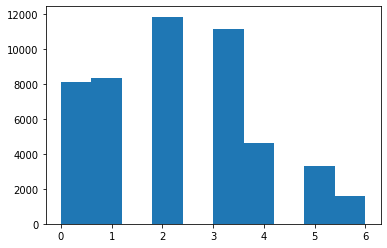

In [152]:
plt.hist(diamonds['clarity scale'])

In [131]:
model=LinearRegression()

In [132]:
model.fit(diamonds[['clarity scale']],diamonds['price'])
y_pred=model.predict(diamonds[['clarity scale']])

In [133]:
mean_squared_error(diamonds['price'],y_pred)**0.5

3963.7260677044824

In [134]:
r2_score(diamonds['price'],y_pred)

0.012776753212325742

In [135]:
model.coef_

array([-284.42375854])

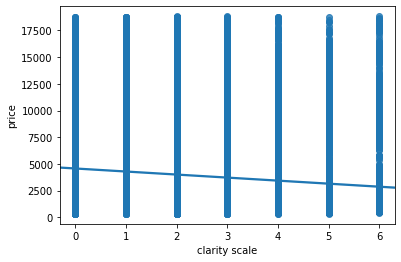

In [136]:
sns.regplot(diamonds['clarity scale'],diamonds['price'])

Lets try creating a different scale fot this variable

In [165]:
diamonds['clarity isIF']=0
diamonds.loc[diamonds['clarity']=='IF','clarity isIF']=1

In [166]:
model=LinearRegression()

In [167]:
model.fit(diamonds[['clarity isIF']],diamonds['price'])
y_pred=model.predict(diamonds[['clarity isIF']])

In [168]:
mean_squared_error(diamonds['price'],y_pred)**0.5

3984.489275191069

In [169]:
r2_score(diamonds['price'],y_pred)

0.002406910320790212

In [170]:
model.coef_

array([-1096.27167735])

# Column color

In [137]:
np.sort(diamonds['color'].unique())

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [138]:
diamonds['color scale']=0
diamonds.loc[diamonds['color']=='J','color scale']=1
diamonds.loc[diamonds['color']=='I','color scale']=2
diamonds.loc[diamonds['color']=='H','color scale']=3
diamonds.loc[diamonds['color']=='G','color scale']=4
diamonds.loc[diamonds['color']=='F','color scale']=5
diamonds.loc[diamonds['color']=='E','color scale']=6
diamonds.loc[diamonds['color']=='D','color scale']=7

(array([ 2540.,  4889.,     0.,  7542.,     0., 10287.,  8653.,     0.,
         8869.,  6160.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

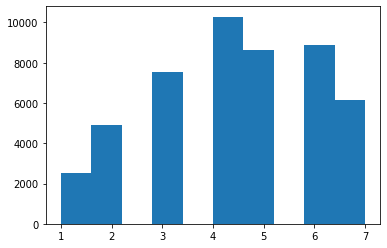

In [151]:
plt.hist(diamonds['color scale'])

In [139]:
model=LinearRegression()

In [140]:
model.fit(diamonds[['color scale']],diamonds['price'])
y_pred=model.predict(diamonds[['color scale']])

In [141]:
mean_squared_error(diamonds['price'],y_pred)**0.5

3929.0510819771234

In [142]:
r2_score(diamonds['price'],y_pred)

0.029973814519239417

In [143]:
model.coef_

array([-406.31124039])

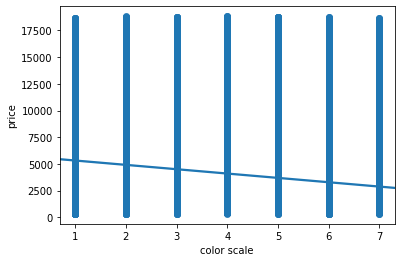

In [144]:
sns.regplot(diamonds['color scale'],diamonds['price'])

Lets try to create a different scale for this variable

In [183]:
diamonds['color isJI']=0
diamonds.loc[diamonds['color']=='J','color isJI']=1
diamonds.loc[diamonds['color']=='I','color isJI']=1

(array([41511.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7429.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

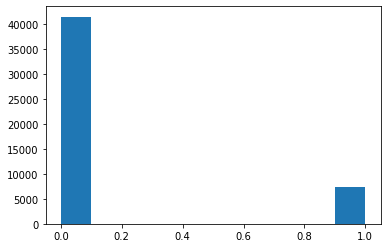

In [184]:
plt.hist(diamonds['color isJI'])

In [188]:
model=LinearRegression()

In [189]:
model.fit(diamonds[['color isJI']],diamonds['price'])
y_pred=model.predict(diamonds[['color isJI']])

In [190]:
mean_squared_error(diamonds['price'],y_pred)**0.5

3953.364461075033

In [192]:
r2_score(diamonds['price'],y_pred)

0.01793142264428582

In [191]:
model.coef_

array([1488.74565732])

# Column Depth

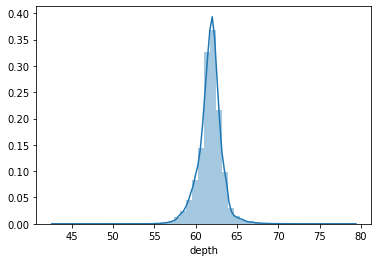

In [155]:
sns.distplot(diamonds['depth'])

In [158]:
model=LinearRegression()

In [159]:
model.fit(diamonds[['depth']],diamonds['price'])
y_pred=model.predict(diamonds[['depth']])

In [160]:
mean_squared_error(diamonds['price'],y_pred)**0.5

3989.0040881497152

In [161]:
r2_score(diamonds['price'],y_pred)

0.00014488997061268272

In [162]:
model.coef_

array([-33.57959927])

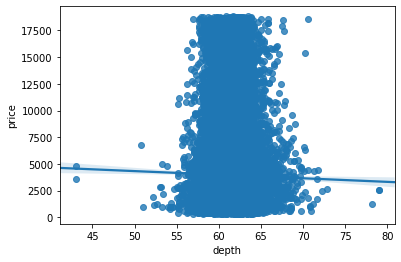

In [164]:
sns.regplot(diamonds['depth'],diamonds['price'])

# Column Table

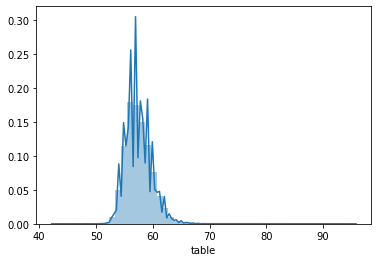

In [198]:
sns.distplot(diamonds['table'])

In [199]:
model=LinearRegression()

In [200]:
model.fit(diamonds[['table']],diamonds['price'])
y_pred=model.predict(diamonds[['table']])

In [201]:
mean_squared_error(diamonds['price'],y_pred)**0.5

3956.564283633864

In [202]:
r2_score(diamonds['price'],y_pred)

0.016341021883371276

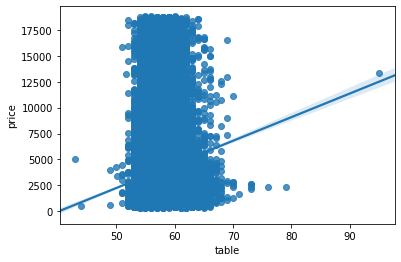

In [203]:
sns.regplot(diamonds['table'],diamonds['price'])

# More explorations

In [157]:
diamonds[['price','carat','cut scale','color scale','clarity scale','x','y','z','depth','table']].describe()

,price,carat,cut scale,color scale,clarity scale,x,y,z,depth,table
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,3934.409644,0.797817,2.761320,4.407254,2.251103,5.730712,5.734333,3.538648,61.751931,57.451161
std,3989.333861,0.474126,1.026359,1.699858,1.585422,1.121920,1.145344,0.706817,1.430026,2.233450
min,326.000000,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,43.000000,43.000000
25%,949.000000,0.400000,2.000000,3.000000,1.000000,4.710000,4.720000,2.910000,61.000000,56.000000
50%,2401.000000,0.700000,3.000000,4.000000,2.000000,5.690000,5.710000,3.520000,61.800000,57.000000
75%,5331.250000,1.040000,4.000000,6.000000,3.000000,6.540000,6.540000,4.040000,62.500000,59.000000
max,18823.000000,5.010000,4.000000,7.000000,6.000000,10.740000,58.900000,31.800000,79.000000,95.000000


In [207]:
diamonds.loc[diamonds['z']==0,:]

,carat,cut,color,clarity,depth,table,price,x,y,z,price predictor,cut scale,clarity scale,color scale,clarity isIF,cut isPremium,color isJI
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,3934.409644,4,1,4,0,1,0
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,3934.409644,4,0,3,0,1,0
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,3934.409644,4,1,4,0,1,0
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,3934.409644,4,1,5,0,1,0
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,3934.409644,1,0,4,0,0,0
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,3934.409644,3,1,5,0,0,0
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,3934.409644,2,3,3,0,0,0
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,3934.409644,3,3,4,0,0,0
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,3934.409644,0,0,4,0,0,0
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,3934.409644,4,1,3,0,1,0


# Correlations

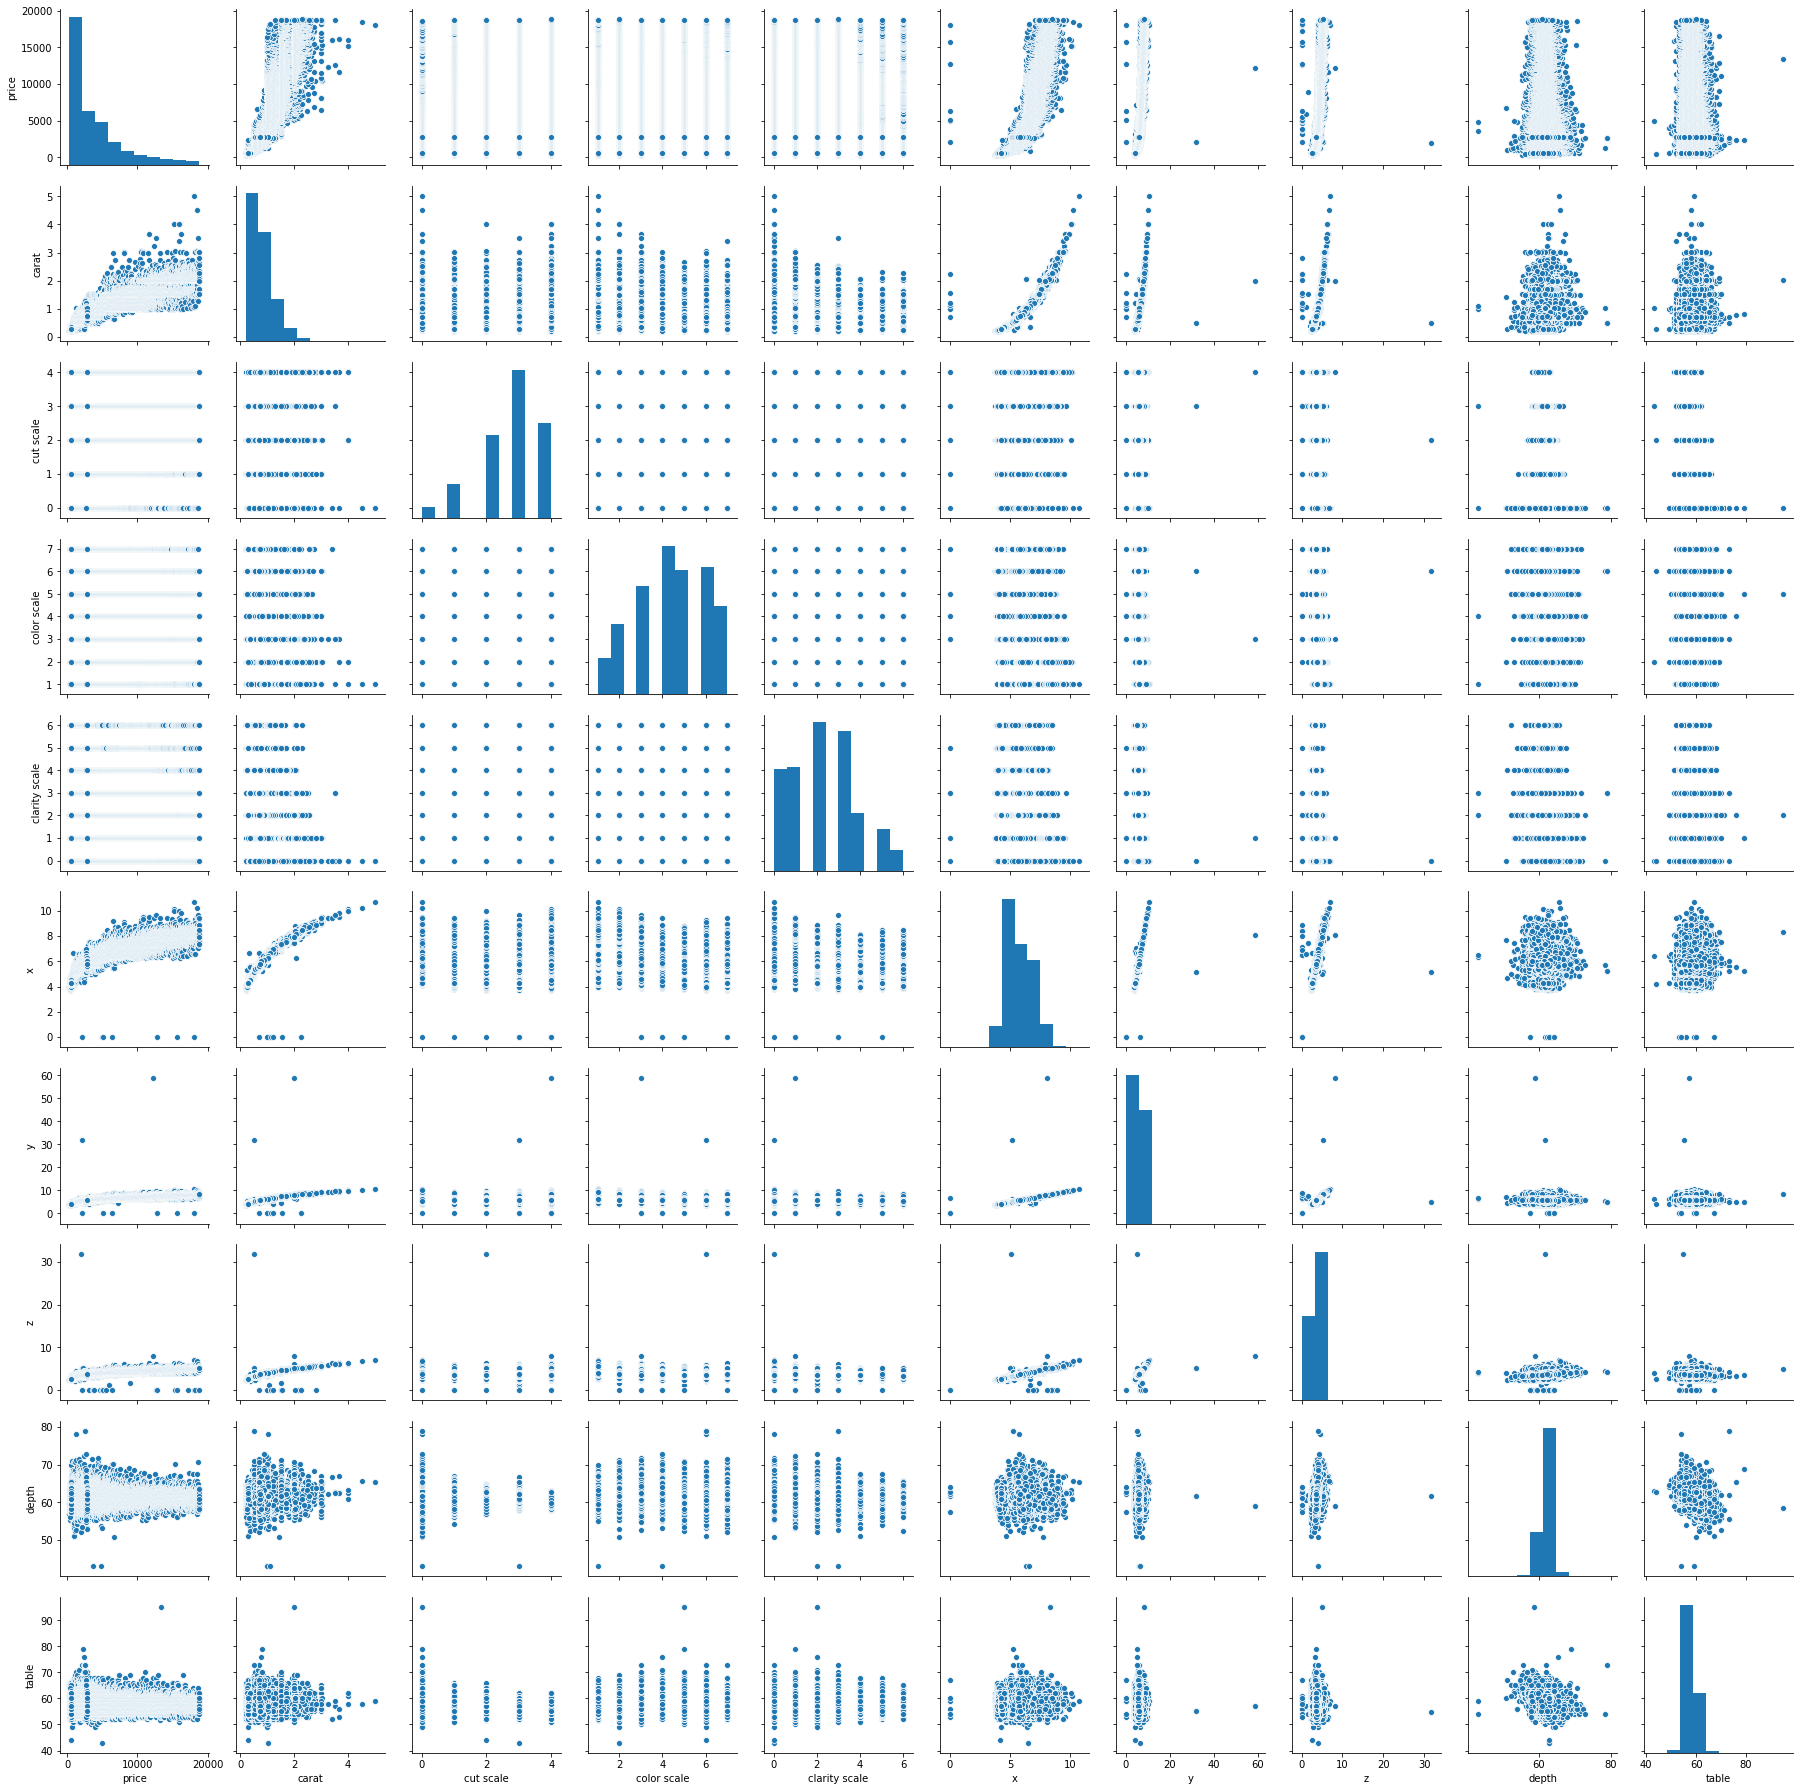

In [146]:
sns.pairplot(diamonds[['price','carat','cut scale','color scale','clarity scale','x','y','z','depth','table']])

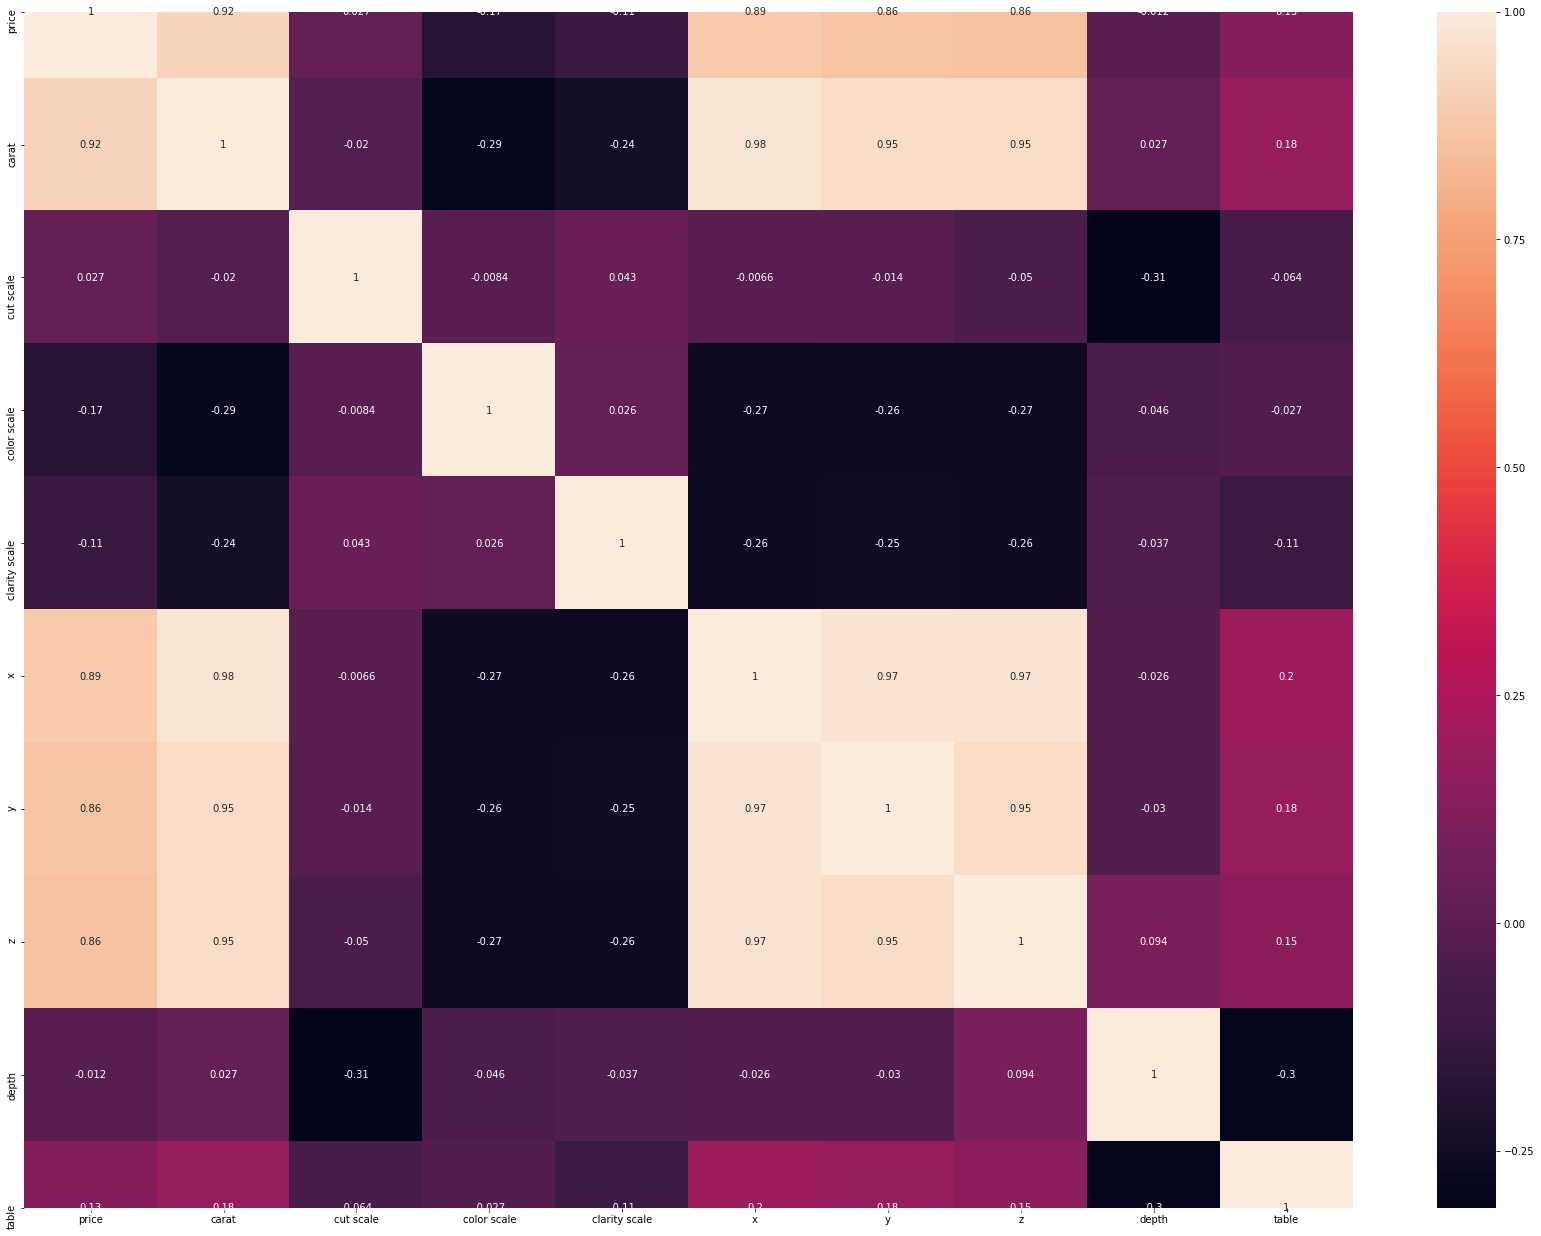

In [150]:
plt.figure(figsize=(30,22))
sns.heatmap(diamonds[['price','carat','cut scale','color scale','clarity scale','x','y','z','depth','table']].corr(), annot=True, square=True)

# Testing the dimensions multiplied variable

In [225]:
diamonds['dimensions multiplied']=diamonds['x']*diamonds['y']*diamonds['z']

In [226]:
model=LinearRegression()
model.fit(diamonds[['dimensions multiplied']],diamonds['price'])
y_pred=model.predict(diamonds[['dimensions multiplied']])

In [227]:
mean_squared_error(diamonds['price'],y_pred)**0.5

1539.8911619943497

In [228]:
r2_score(diamonds['price'],y_pred)

0.8508063377189706

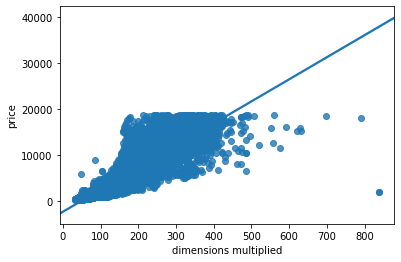

In [229]:
sns.regplot(diamonds['dimensions multiplied'],diamonds['price'])

## Outlier

In [218]:
diamonds.drop(diamonds[diamonds['dimensions multiplied']>3000].index,inplace=True)

In [224]:
diamonds.drop(diamonds[diamonds['dimensions multiplied']==0].index,inplace=True)

In [231]:
diamonds.loc[diamonds['dimensions multiplied']>600,:]

,carat,cut,color,clarity,depth,table,price,x,y,z,price predictor,cut scale,clarity scale,color scale,clarity isIF,cut isPremium,color isJI,dimensions multiplied
23577,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,3934.409644,4,0,2,0,1,1,631.894380
23578,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24,3934.409644,4,0,1,0,1,1,621.496512
23971,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31,3934.409644,2,0,2,0,0,1,627.841214
24851,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,3934.409644,0,0,1,0,0,1,790.133208
25047,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,3934.409644,0,0,1,0,0,1,698.455296
43882,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,3934.409644,2,0,6,0,0,0,838.502400
44603,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,3934.409644,3,0,6,0,0,0,838.502400


# Model v1

In [258]:
diamonds['price'].max()

18823

In [268]:
model=LinearRegression()
model.fit(diamonds[['dimensions multiplied']],diamonds['price'])
y_pred=model.predict(diamonds[['dimensions multiplied']])

In [269]:
model.coef_

array([48.00225369])

In [270]:
model.intercept_

-2299.2740468528627

In [286]:
def modelv1(df, diamonds=diamonds):
    diamonds['dimensions multiplied']=diamonds['x']*diamonds['y']*diamonds['z']
    df['dimensions multiplied']=df['x']*df['y']*df['z']
    model=LinearRegression()
    model.fit(diamonds[['dimensions multiplied']],diamonds['price'])
    y_pred=model.predict(df[['dimensions multiplied']])
    df['price_predicted']=y_pred
    df.loc[df['dimensions multiplied']>420,'price_predicted']=18823
    sns.regplot(df['dimensions multiplied'],df['price_predicted'])

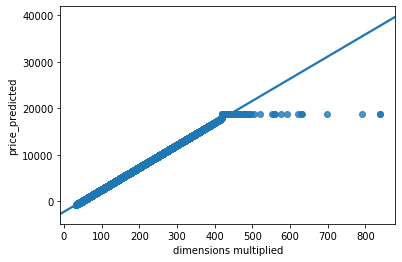

In [287]:
modelv1(diamonds)

In [288]:
ricks_diamonds=pd.read_csv("data/rick_diamonds.csv")

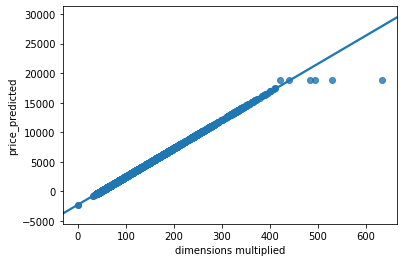

In [289]:
modelv1(ricks_diamonds,diamonds)

In [290]:
ricks_diamonds.to_csv("./rick_diamonds_prediction.csv")

# Model v2

In [333]:
def modelv2(df, diamonds=diamonds):
    diamonds['dimensions multiplied']=diamonds['x']*diamonds['y']*diamonds['z']
    df['dimensions multiplied']=df['x']*df['y']*df['z']
    model=LinearRegression()
    model.fit(diamonds[['dimensions multiplied','carat']],diamonds['price'])
    y_pred=model.predict(df[['dimensions multiplied','carat']])
    df['price_predicted']=y_pred
    df.loc[(df['dimensions multiplied']>410) | (df['carat']>2.6),'price_predicted']=18823
    sns.regplot(df['dimensions multiplied'],df['price_predicted'])
    plt.show()
    sns.regplot(df['carat'],df['price_predicted'])
    plt.show()
    print(mean_squared_error(diamonds['price'],model.predict(diamonds[['dimensions multiplied','carat']]))**0.5)

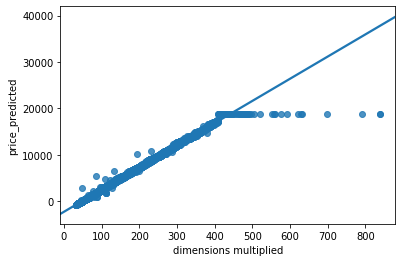

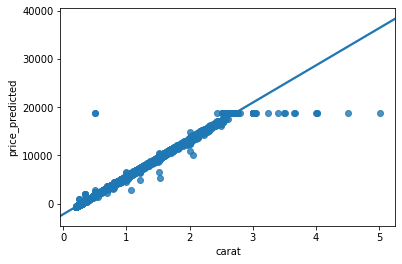

1534.364889839673


In [334]:
modelv2(diamonds)

# Model v3

In [317]:
def modelv3(df, diamonds=diamonds):
    model=LinearRegression()
    model.fit(diamonds[['carat']],diamonds['price'])
    y_pred=model.predict(df[['carat']])
    df['price_predicted']=y_pred
    df.loc[df['carat']>2.7,'price_predicted']=18823
    sns.regplot(df['carat'],df['price_predicted'])
    print(mean_squared_error(diamonds['price'],model.predict(diamonds[['carat']]))**0.5)

1542.0031404542692


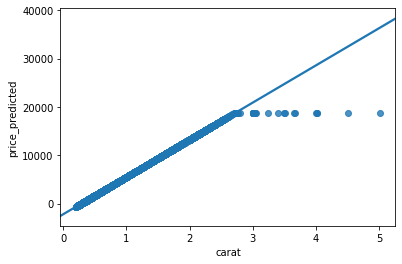

In [318]:
modelv3(diamonds)